# KMeans Clustering of Financial Metrics
This notebook fetches financial metrics for selected tickers, preprocesses the data, applies KMeans clustering, and visualizes the results.

In [ ]:
from src.kmean_modeling import calculate_inertia, apply_kmeans_and_visualize
from src.data_processing import fetch_financial_metrics
from src.preprocessing import create_preprocessor, preview_transformation
import pandas as pd
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Adjust to your physical core count

## Define Tickers

In [2]:
tickers = [
    'VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'BBDC4.SA', 'BBAS3.SA', 
    'ABEV3.SA', 'RENT3.SA', 'WEGE3.SA', 'ELET3.SA', 'SUZB3.SA', 
    'B3SA3.SA', 'GGBR4.SA', 'EGIE3.SA', 'HAPV3.SA', 'RDOR3.SA', 
    'TOTS3.SA', 'RADL3.SA', 'PRIO3.SA', 'LREN3.SA', 'MGLU3.SA', 
    'VIVT3.SA', 'SBSP3.SA', 'FLRY3.SA', 'GOAU4.SA', 'CPLE6.SA', 
    'ENGI11.SA', 'SANB11.SA', 'BPAC11.SA', 'CXSE3.SA', 'ASAI3.SA'
]

## Fetch Financial Metrics

In [13]:
data = fetch_financial_metrics(tickers)
data.head()

,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt
0,VALE3.SA,0.12837,50.133,0.13814,1.022,250107740160,6.166000e+09,3.452800e+10,4.562400e+10
1,PETR4.SA,0.18483,92.443,0.15185,0.289,414956126208,7.528000e+09,5.935000e+10,1.222950e+11
2,ITUB4.SA,0.20809,NaN,0.31790,0.283,387382444032,4.108500e+10,2.212840e+11,2.633191e+12
3,BBDC4.SA,0.12346,NaN,0.23561,0.384,168208580608,1.725290e+10,1.689425e+11,1.900542e+12
4,BBAS3.SA,0.15581,NaN,0.30000,0.305,123187060736,2.635886e+10,1.842363e+11,2.214483e+12


## Preprocessing (ROE and Debt-to-Equity only)

In [12]:
num_cols = ['roe', 'debt_to_equity']
for col in num_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col].fillna(data[col].median(), inplace=True)

preprocessor = create_preprocessor(num_cols=num_cols)
scaled_features = preview_transformation(preprocessor, data[num_cols])

df_processed = pd.DataFrame(scaled_features, columns=num_cols)
df_processed['ticker'] = data['ticker'].values
df_processed.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_5620\3563364498.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_5620\3563364498.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

,roe,debt_to_equity,ticker
0,0.282531,0.106116,VALE3.SA
1,0.397940,0.195812,PETR4.SA
2,0.445485,0.163815,ITUB4.SA
3,0.272495,0.163815,BBDC4.SA
4,0.338621,0.163815,BBAS3.SA


## KMeans Clustering and Visualization


Médias dos Clusters (por ROE e D/E quando disponíveis):
              roe  debt_to_equity
Cluster                          
0        0.168775       61.018000
1        0.180315      176.601833
2        0.176870      471.781000
3        0.358733       44.973750
4        0.061764       57.918375


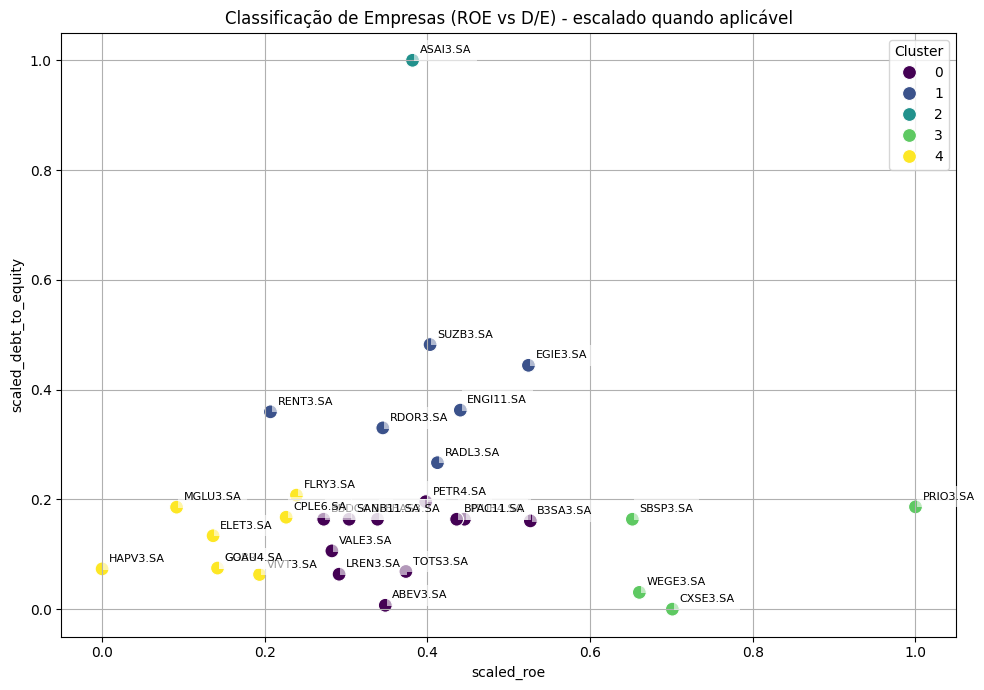

In [6]:
results = apply_kmeans_and_visualize(df_processed, data, optimal_k=5)

## Show the Head of Each Cluster

In [7]:
for cluster_id in sorted(results['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    display(results[results['Cluster'] == cluster_id].head())


Cluster 0:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
0,VALE3.SA,0.12837,50.133,0.13814,1.022,250107740160,6.166000e+09,3.452800e+10,4.562400e+10,0.282531,0.106116,0
1,PETR4.SA,0.18483,92.443,0.15185,0.289,414956126208,7.528000e+09,5.935000e+10,1.222950e+11,0.397940,0.195812,0
2,ITUB4.SA,0.20809,77.350,0.31790,0.283,387382444032,4.108500e+10,2.212840e+11,2.633191e+12,0.445485,0.163815,0
3,BBDC4.SA,0.12346,77.350,0.23561,0.384,168208580608,1.725290e+10,1.689425e+11,1.900542e+12,0.272495,0.163815,0
4,BBAS3.SA,0.15581,77.350,0.30000,0.305,123187060736,2.635886e+10,1.842363e+11,2.214483e+12,0.338621,0.163815,0



Cluster 1:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
6,RENT3.SA,0.09141,169.658,0.05876,0.329,41124671488,1.813627e+09,2.634271e+10,6.090089e+10,0.206983,0.359506,1
9,SUZB3.SA,0.18742,227.437,0.15256,0.292,62660575232,-7.074198e+09,3.241558e+10,1.335205e+11,0.403234,0.481996,1
12,EGIE3.SA,0.24659,209.629,0.25270,0.368,32881887232,4.279349e+09,1.228040e+10,3.783190e+10,0.524181,0.444244,1
14,RDOR3.SA,0.15899,155.841,0.07788,1.022,91800518656,3.846945e+09,2.670187e+10,7.589601e+10,0.345121,0.330214,1
16,RADL3.SA,0.19186,125.938,0.02982,0.162,32255860736,1.197694e+09,6.442195e+09,1.569950e+10,0.412309,0.266820,1



Cluster 2:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
29,ASAI3.SA,0.17687,471.781,0.01209,0.41,12185629696,769000000.0,5.255000e+09,4.033800e+10,0.381669,1.0,2



Cluster 3:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
7,WEGE3.SA,0.31330,14.482,0.15650,0.035,152723341312,6.042593e+09,2.312522e+10,1.836448e+10,0.660541,0.030536,3
17,PRIO3.SA,0.47937,87.985,0.73486,0.901,31025956864,1.030161e+10,2.592419e+10,2.982197e+10,1.000000,0.186361,3
21,SBSP3.SA,0.30910,77.350,0.27755,0.157,87202193408,9.579563e+09,3.692805e+10,4.403738e+10,0.651956,0.163815,3
28,CXSE3.SA,0.33316,0.078,0.76524,0.352,45209997312,3.765184e+09,1.288932e+10,1.134692e+09,0.701137,0.000000,3



Cluster 4:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
8,ELET3.SA,0.05690,63.152,0.15169,0.281,118642245632,1.037812e+10,1.219998e+11,1.678716e+11,0.136442,0.133715,4
11,GGBR4.SA,0.05977,35.410,0.04731,0.853,33185959936,4.566317e+09,5.817379e+10,2.864071e+10,0.142308,0.074903,4
13,HAPV3.SA,-0.00985,34.667,-0.01623,0.315,17753890816,-6.493010e+08,4.867692e+10,2.482272e+10,0.000000,0.073328,4
19,MGLU3.SA,0.03496,87.740,0.01006,1.337,6749096960,4.487170e+08,1.131926e+10,2.599260e+10,0.091595,0.185842,4
20,VIVT3.SA,0.08485,29.855,0.10117,0.353,106785497088,5.547948e+09,6.979950e+10,5.514118e+10,0.193573,0.063127,4


In [8]:
for cluster_id in sorted(results['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    display(results[results['Cluster'] == cluster_id].head())


Cluster 0:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
0,VALE3.SA,0.12837,50.133,0.13814,1.022,250107740160,6.166000e+09,3.452800e+10,4.562400e+10,0.282531,0.106116,0
1,PETR4.SA,0.18483,92.443,0.15185,0.289,414956126208,7.528000e+09,5.935000e+10,1.222950e+11,0.397940,0.195812,0
2,ITUB4.SA,0.20809,77.350,0.31790,0.283,387382444032,4.108500e+10,2.212840e+11,2.633191e+12,0.445485,0.163815,0
3,BBDC4.SA,0.12346,77.350,0.23561,0.384,168208580608,1.725290e+10,1.689425e+11,1.900542e+12,0.272495,0.163815,0
4,BBAS3.SA,0.15581,77.350,0.30000,0.305,123187060736,2.635886e+10,1.842363e+11,2.214483e+12,0.338621,0.163815,0



Cluster 1:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
6,RENT3.SA,0.09141,169.658,0.05876,0.329,41124671488,1.813627e+09,2.634271e+10,6.090089e+10,0.206983,0.359506,1
9,SUZB3.SA,0.18742,227.437,0.15256,0.292,62660575232,-7.074198e+09,3.241558e+10,1.335205e+11,0.403234,0.481996,1
12,EGIE3.SA,0.24659,209.629,0.25270,0.368,32881887232,4.279349e+09,1.228040e+10,3.783190e+10,0.524181,0.444244,1
14,RDOR3.SA,0.15899,155.841,0.07788,1.022,91800518656,3.846945e+09,2.670187e+10,7.589601e+10,0.345121,0.330214,1
16,RADL3.SA,0.19186,125.938,0.02982,0.162,32255860736,1.197694e+09,6.442195e+09,1.569950e+10,0.412309,0.266820,1



Cluster 2:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
29,ASAI3.SA,0.17687,471.781,0.01209,0.41,12185629696,769000000.0,5.255000e+09,4.033800e+10,0.381669,1.0,2



Cluster 3:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
7,WEGE3.SA,0.31330,14.482,0.15650,0.035,152723341312,6.042593e+09,2.312522e+10,1.836448e+10,0.660541,0.030536,3
17,PRIO3.SA,0.47937,87.985,0.73486,0.901,31025956864,1.030161e+10,2.592419e+10,2.982197e+10,1.000000,0.186361,3
21,SBSP3.SA,0.30910,77.350,0.27755,0.157,87202193408,9.579563e+09,3.692805e+10,4.403738e+10,0.651956,0.163815,3
28,CXSE3.SA,0.33316,0.078,0.76524,0.352,45209997312,3.765184e+09,1.288932e+10,1.134692e+09,0.701137,0.000000,3



Cluster 4:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
8,ELET3.SA,0.05690,63.152,0.15169,0.281,118642245632,1.037812e+10,1.219998e+11,1.678716e+11,0.136442,0.133715,4
11,GGBR4.SA,0.05977,35.410,0.04731,0.853,33185959936,4.566317e+09,5.817379e+10,2.864071e+10,0.142308,0.074903,4
13,HAPV3.SA,-0.00985,34.667,-0.01623,0.315,17753890816,-6.493010e+08,4.867692e+10,2.482272e+10,0.000000,0.073328,4
19,MGLU3.SA,0.03496,87.740,0.01006,1.337,6749096960,4.487170e+08,1.131926e+10,2.599260e+10,0.091595,0.185842,4
20,VIVT3.SA,0.08485,29.855,0.10117,0.353,106785497088,5.547948e+09,6.979950e+10,5.514118e+10,0.193573,0.063127,4


In [9]:
# Estatísticas descritivas por cluster (média, mediana, desvio padrão, mínimo, máximo)
for cluster_id in sorted(results['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    cluster_df = results[results['Cluster'] == cluster_id]
    print("Média:")
    print(cluster_df[['roe', 'debt_to_equity']].mean())
    print("Mediana:")
    print(cluster_df[['roe', 'debt_to_equity']].median())
    print("Desvio padrão:")
    print(cluster_df[['roe', 'debt_to_equity']].std())
    print("Mínimo:")
    print(cluster_df[['roe', 'debt_to_equity']].min())
    print("Máximo:")
    print(cluster_df[['roe', 'debt_to_equity']].max())


Cluster 0:
Média:
roe                0.168775
debt_to_equity    61.018000
dtype: float64
Mediana:
roe                0.16049
debt_to_equity    77.35000
dtype: float64
Desvio padrão:
roe                0.039222
debt_to_equity    27.845857
dtype: float64
Mínimo:
roe               0.12346
debt_to_equity    3.38800
dtype: float64
Máximo:
roe                0.24775
debt_to_equity    92.44300
dtype: float64

Cluster 1:
Média:
roe                 0.180315
debt_to_equity    176.601833
dtype: float64
Mediana:
roe                 0.18964
debt_to_equity    170.38300
dtype: float64
Desvio padrão:
roe                0.052106
debt_to_equity    36.745729
dtype: float64
Mínimo:
roe                 0.09141
debt_to_equity    125.93800
dtype: float64
Máximo:
roe                 0.24659
debt_to_equity    227.43700
dtype: float64

Cluster 2:
Média:
roe                 0.17687
debt_to_equity    471.78100
dtype: float64
Mediana:
roe                 0.17687
debt_to_equity    471.78100
dtype: float64
Desvio p

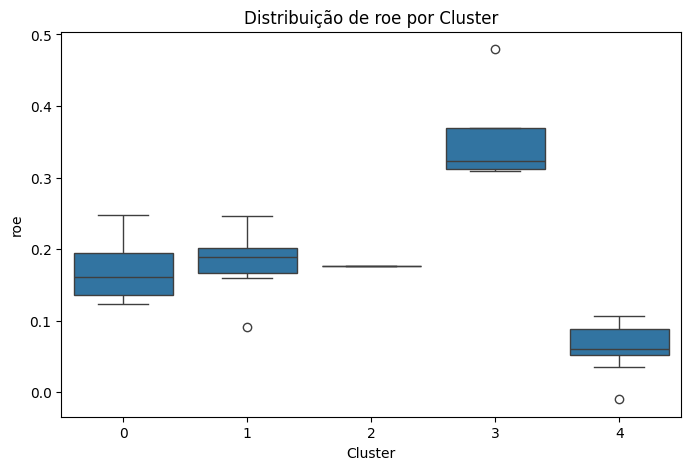

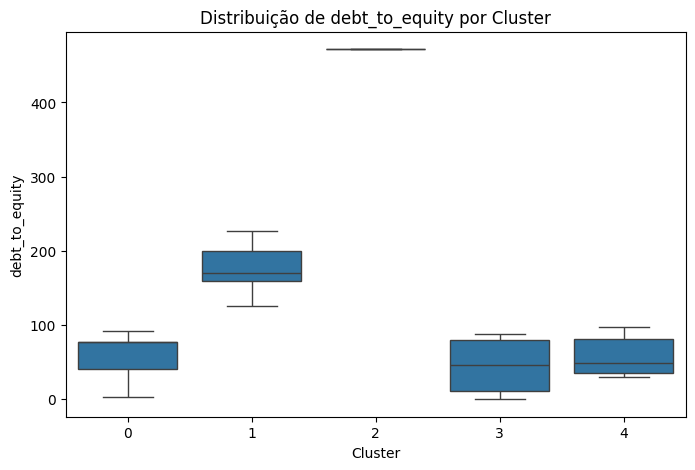

In [10]:
# Boxplot para visualizar distribuição e outliers de cada cluster
import matplotlib.pyplot as plt
import seaborn as sns

for var in ['roe', 'debt_to_equity']:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Cluster', y=var, data=results)
    plt.title(f'Distribuição de {var} por Cluster')
    plt.show()

In [11]:
# Contagem de outliers por cluster usando o método do IQR
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum()

for cluster_id in sorted(results['Cluster'].unique()):
    cluster_df = results[results['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} - Outliers:")
    for var in ['roe', 'debt_to_equity']:
        n_out = count_outliers(cluster_df[var])
        print(f"{var}: {n_out} outliers")


Cluster 0 - Outliers:
roe: 0 outliers
debt_to_equity: 0 outliers

Cluster 1 - Outliers:
roe: 1 outliers
debt_to_equity: 0 outliers

Cluster 2 - Outliers:
roe: 0 outliers
debt_to_equity: 0 outliers

Cluster 3 - Outliers:
roe: 1 outliers
debt_to_equity: 0 outliers

Cluster 4 - Outliers:
roe: 1 outliers
debt_to_equity: 0 outliers


Esses códigos vão mostrar:

Média, mediana, desvio padrão, mínimo e máximo de ROE e D/E por cluster.
Boxplots para visualizar a distribuição e possíveis outliers.
Quantidade de outliers em cada cluster para cada variável.
Coloque cada bloco em uma célula separada do seu notebook para facilitar a análise!